# Data Science and Visualization (RUC F2023)

## Lecture 8: Clustering II

 # Data Binning


## 1. The raw data

In [1]:
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('C:/Data/Ch5_age_income_data.csv')
data.head()

,bin,age,income
0,60-69,64,87083.236510
1,30-39,33,76807.824635
2,20-29,24,12043.598766
3,30-39,33,61972.002432
4,70-79,78,60120.315192


### How was the **bin** column generated?

In [3]:
data.age.min()

18

In [4]:
data.age.max()

89

In [5]:
def generateBin(age):
    if (age < 20):
        return '10-19'
    elif (age < 30):
        return '20-29'
    elif (age < 40):
        return '30-39'
    elif (age < 50):
        return '40-49'
    elif (age < 60):
        return '50-59'
    elif (age < 70):
        return '60-69'
    elif (age < 80):
        return '70-79'
    elif (age < 90):
        return '80-89'

In [6]:
data['bin2'] = data['age'].apply(generateBin)
data.head()

,bin,age,income,bin2
0,60-69,64,87083.236510,60-69
1,30-39,33,76807.824635,30-39
2,20-29,24,12043.598766,20-29
3,30-39,33,61972.002432,30-39
4,70-79,78,60120.315192,70-79


### Histogram plotting

(array([ 195., 2091., 1883., 1267., 1118.,  798.,  478.,  275.]),
 array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <a list of 8 Patch objects>)

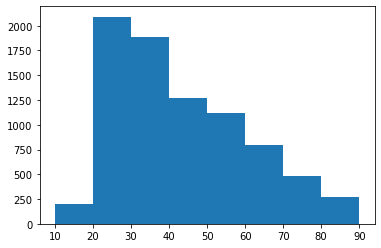

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(data['age'],  bins=range(10, 100, 10))
#plt.xticks([0, 20, 40, 60, 80, 100])

## 2. Fixed-Width Binning

Here we use pandas.**cut(.)** function. It requires a number of bins or a series of bins.

### Without explicit bins but the number of bins

In [8]:
data['age_binned_1'] = pd.cut(data['age'], 8)

In [9]:
data['age_binned_1'].unique().categories

IntervalIndex([(17.929, 26.875], (26.875, 35.75], (35.75, 44.625], (44.625, 53.5], (53.5, 62.375], (62.375, 71.25], (71.25, 80.125], (80.125, 89.0]], dtype='interval[float64, right]')

In [10]:
data.head()

,bin,age,income,bin2,age_binned_1
0,60-69,64,87083.236510,60-69,"(62.375, 71.25]"
1,30-39,33,76807.824635,30-39,"(26.875, 35.75]"
2,20-29,24,12043.598766,20-29,"(17.929, 26.875]"
3,30-39,33,61972.002432,30-39,"(26.875, 35.75]"
4,70-79,78,60120.315192,70-79,"(71.25, 80.125]"


### With explict bins

In [11]:
fixed_width_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]

In [12]:
data['age_binned_2'] = pd.cut(data['age'], fixed_width_bins)

In [13]:
data.head()

,bin,age,income,bin2,age_binned_1,age_binned_2
0,60-69,64,87083.236510,60-69,"(62.375, 71.25]","(60, 70]"
1,30-39,33,76807.824635,30-39,"(26.875, 35.75]","(30, 40]"
2,20-29,24,12043.598766,20-29,"(17.929, 26.875]","(20, 30]"
3,30-39,33,61972.002432,30-39,"(26.875, 35.75]","(30, 40]"
4,70-79,78,60120.315192,70-79,"(71.25, 80.125]","(70, 80]"


In [14]:
data['age_binned_2'].unique().categories

IntervalIndex([(10, 20], (20, 30], (30, 40], (40, 50], (50, 60], (60, 70], (70, 80], (80, 90]], dtype='interval[int64, right]')

## 3. Quantile Binning

Here we use pandas.**qcut(.)** function. It requires a number of bins or a series of bins.

In [15]:
data['age_binned_q'] = pd.qcut(data['age'], 8)
data

,bin,age,income,bin2,age_binned_1,age_binned_2,age_binned_q
0,60-69,64,87083.236510,60-69,"(62.375, 71.25]","(60, 70]","(55.0, 66.0]"
1,30-39,33,76807.824635,30-39,"(26.875, 35.75]","(30, 40]","(28.0, 33.0]"
2,20-29,24,12043.598766,20-29,"(17.929, 26.875]","(20, 30]","(17.999, 24.0]"
3,30-39,33,61972.002432,30-39,"(26.875, 35.75]","(30, 40]","(28.0, 33.0]"
4,70-79,78,60120.315192,70-79,"(71.25, 80.125]","(70, 80]","(66.0, 89.0]"
...,...,...,...,...,...,...,...
8100,70-79,72,58520.584848,70-79,"(71.25, 80.125]","(70, 80]","(66.0, 89.0]"
8101,60-69,65,52685.667872,60-69,"(62.375, 71.25]","(60, 70]","(55.0, 66.0]"
8102,20-29,24,30334.468418,20-29,"(17.929, 26.875]","(20, 30]","(17.999, 24.0]"
8103,20-29,21,50360.341896,20-29,"(17.929, 26.875]","(20, 30]","(17.999, 24.0]"


In [16]:
data['age_binned_q'].unique().categories

IntervalIndex([(17.999, 24.0], (24.0, 28.0], (28.0, 33.0], (33.0, 39.0], (39.0, 47.0], (47.0, 55.0], (55.0, 66.0], (66.0, 89.0]], dtype='interval[float64, right]')

In [17]:
series_2 = data.groupby(['age_binned_q'])['age'].count()

In [18]:
data['age_binned_q'].unique().categories

IntervalIndex([(17.999, 24.0], (24.0, 28.0], (28.0, 33.0], (33.0, 39.0], (39.0, 47.0], (47.0, 55.0], (55.0, 66.0], (66.0, 89.0]], dtype='interval[float64, right]')

In [19]:
index = ['[18, 24]', '(24, 28]', '(28, 33]', '(33, 39]', '(39, 47]', '(47, 55]', '(55, 66]', '(66, 89]']

([<matplotlib.axis.XTick at 0x1f17458b3d0>,
 <a list of 8 Text major ticklabel objects>)

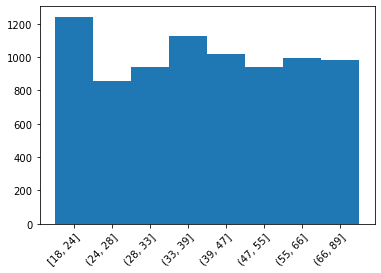

In [20]:
plt.bar(index, series_2.values, width=1)

plt.xticks(index,  rotation=45, ha='right', rotation_mode='anchor')

## 4. Binning with Labels

In [21]:
#Creating bins and labels
bins = [10, 20, 40, 50, 60, 70, 80, 90]

labels = ['teenage','young', 'middle age', 'experienced', 'senior', 'old', 'very old']

data['age_range'] = pd.cut(data['age'], bins=bins, labels=labels)
data

,bin,age,income,bin2,age_binned_1,age_binned_2,age_binned_q,age_range
0,60-69,64,87083.236510,60-69,"(62.375, 71.25]","(60, 70]","(55.0, 66.0]",senior
1,30-39,33,76807.824635,30-39,"(26.875, 35.75]","(30, 40]","(28.0, 33.0]",young
2,20-29,24,12043.598766,20-29,"(17.929, 26.875]","(20, 30]","(17.999, 24.0]",young
3,30-39,33,61972.002432,30-39,"(26.875, 35.75]","(30, 40]","(28.0, 33.0]",young
4,70-79,78,60120.315192,70-79,"(71.25, 80.125]","(70, 80]","(66.0, 89.0]",old
...,...,...,...,...,...,...,...,...
8100,70-79,72,58520.584848,70-79,"(71.25, 80.125]","(70, 80]","(66.0, 89.0]",old
8101,60-69,65,52685.667872,60-69,"(62.375, 71.25]","(60, 70]","(55.0, 66.0]",senior
8102,20-29,24,30334.468418,20-29,"(17.929, 26.875]","(20, 30]","(17.999, 24.0]",young
8103,20-29,21,50360.341896,20-29,"(17.929, 26.875]","(20, 30]","(17.999, 24.0]",young


In [22]:
data['age_range'].unique().categories

Index(['teenage', 'young', 'middle age', 'experienced', 'senior', 'old',
       'very old'],
      dtype='object')

In [23]:
series_3 = data.groupby(['age_range'])['age'].count()
series_3

age_range
teenage         396
young          3901
middle age     1255
experienced    1078
senior          785
old             435
very old        255
Name: age, dtype: int64

([<matplotlib.axis.XTick at 0x1f174601040>,
 <a list of 7 Text major ticklabel objects>)

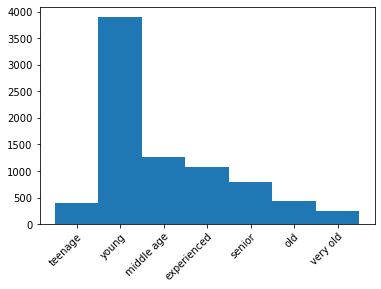

In [24]:
plt.bar(labels, series_3.values, width=1)

plt.xticks(labels,  rotation=45, ha='right', rotation_mode='anchor')